* 데이터셋 소개
    * 해당 Kaggle 데이터셋( https://www.kaggle.com/blastchar/telco-customer-churn )은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
* 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
    * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
    * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
    * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
    * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [ ]:
# 데이터 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

## 기술 통계


- **평균 (Mean)**: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$
  - 모든 데이터 포인트의 합을 데이터의 개수로 나눈 값
- **표본 분산 (Sample Variance)**: $s^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2$
  - 각 데이터 포인트와 평균의 차이의 제곱의 합을 자유도(n-1)로 나눈 값
- **표준편차 (Standard Deviation)**: $s = \sqrt{s^2}$
  - 분산의 제곱근
- **Z-점수 (Z-Score)**: $z = \frac{x - \mu}{\sigma}$
  - 개별 데이터 포인트가 평균으로부터 표준편차의 몇 배 떨어져 있는지 나타내는 값
- **t-통계량 (t-Statistic)**: $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$
  - 표본 평균이 모집단 평균으로부터 얼마나 떨어져 있는지 나타내는 값


## 여러 집단의 평균 비교 분석

### 분산분석 (ANOVA)

* 목적: 서로 다른 집단(예: 인터넷 서비스 타입별)의 평균이 유의미하게 다른지 비교합니다.
* 방법: statsmodels의 ols 함수로 선형 모델을 만들고, anova_lm 함수로 ANOVA를 수행합니다.

### 등분산성 검정 (Levene Test)
* 목적: 서로 다른 집단의 분산이 동일한지 검정합니다. ANOVA는 분산이 동일하다는 가정을 바탕으로 합니다.
* 방법: scipy.stats.levene 함수를 사용하여 각 집단의 월별 요금 데이터에 대한 등분산성을 검정합니다.

### 다중비교 (Tukey's HSD)
* 목적: 만약 ANOVA에서 집단 간 차이가 유의미하다는 결과가 나온 경우, 어떤 집단 간에 차이가 있는지 구체적으로 비교합니다.
* 방법: statsmodels.stats.multicomp.pairwise_tukeyhsd 함수를 사용하여 모든 집단 쌍 간의 평균 차이를 비교합니다.


#### 비즈니스 인사이트
* 인터넷 서비스 타입별로 월별 요금에 유의미한 차이가 있는지 파악하는 데 도움이 됩니다.
* 예를 들어, 특정 서비스 타입이 다른 타입보다 비용이 더 높다면, 이는 마케팅 전략이나 가격 정책을 재검토하는 데 중요한 정보가 될 수 있습니다. 또한 고객의 만족도나 이탈률과 관련하여 서비스 타입별 차이를 분석하는 근거를 제공할 수 있습니다.

### 정규성 검정

In [ ]:
# sm.qqplot(line='s')는 표준선을 그려 데이터가 정규 분포를 따르는지 확인하는 데 도움을 줍니다.
# QQ 플롯에서 데이터 포인트들이 직선에 가깝게 배열되어 있으면, 데이터가 정규 분포를 따른다고 해석할 수 있습니다.
# 데이터 포인트들이 직선에서 크게 벗어나 있으면, 데이터가 정규 분포를 따르지 않는다는 신호일 수 있습니다.
# 'InternetService' 범주별로 'MonthlyCharges'의 QQ 플롯 생성
services = ['DSL', 'Fiber optic', 'No']
df["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
df.groupby("InternetService")["MonthlyCharges"].describe()

,count,mean,std,min,25%,50%,75%,max
InternetService,,,,,,,,
DSL,2421.0,58.102169,16.259522,23.45,46.20,56.150,69.90,94.80
Fiber optic,3096.0,91.500129,12.663039,67.75,80.55,91.675,101.15,118.75
No,1526.0,21.079194,2.164221,18.25,19.70,20.150,20.90,26.90


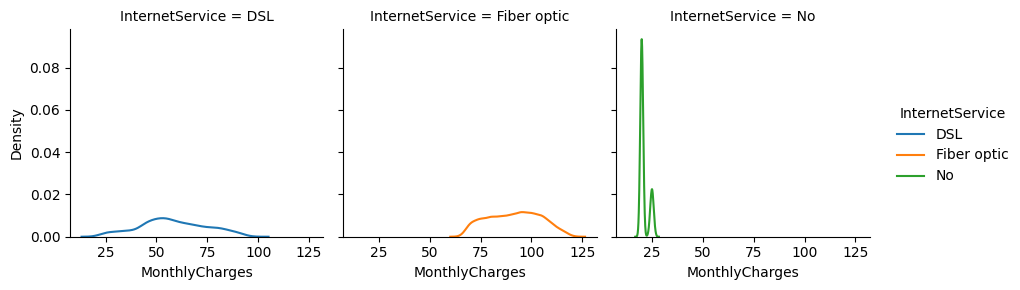

In [ ]:
sns.displot(data=df, x="MonthlyCharges", hue="InternetService", col="InternetService", height=3, kind="kde")

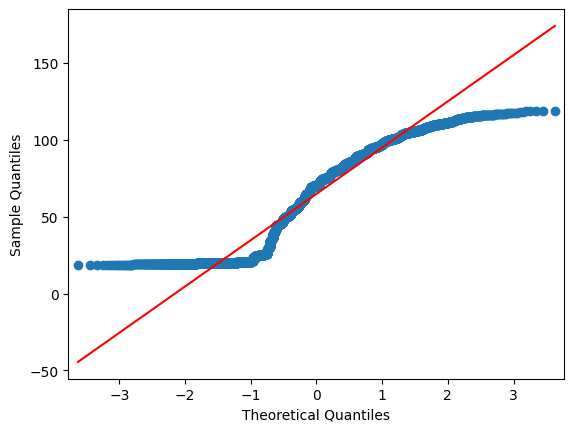

In [ ]:
sm.qqplot(data=df["MonthlyCharges"], line="s");

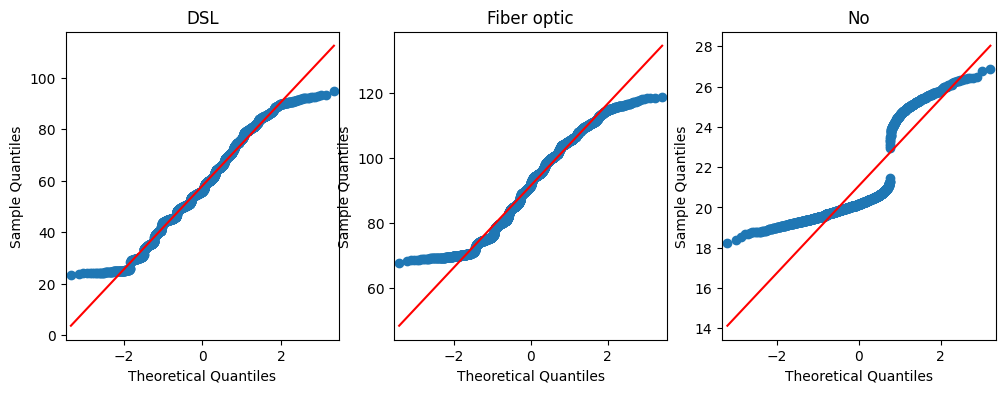

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, sv in enumerate(services):
    sm.qqplot(df.loc[df["InternetService"] == sv, "MonthlyCharges"], line="s", ax=axes[i]);
    axes[i].set_title(sv)



### Ordinary Least Squares(OLS) 선형 회귀 모델
* response는 종속 변수, predictors는 하나 이상의 독립 변수, 그리고 dataframe은 분석에 사용할 데이터프레임입니다. R 스타일의 모델 공식을 사용하여 종속 변수와 독립 변수 간의 관계를 정의합니다.

* 기능
    * OLS 회귀 분석을 수행하여 변수 간의 선형 관계를 모델링합니다.
    * 모델을 피팅한 후, 계수 추정값, p-값, R-제곱 값 등 다양한 통계적 결과를 제공합니다.
* 주요 사용 사례
    * 단순 선형 회귀: 하나의 독립 변수와 종속 변수 간의 관계 분석.
    * 다중 선형 회귀: 여러 독립 변수와 종속 변수 간의 관계 분석.
    * ANOVA 또는 ANCOVA 분석에도 사용될 수 있습니다.
    
* [statsmodels.formula.api.ols - statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html)

* [statsmodels.stats.anova.anova\_lm - statsmodels 0.14.1](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

* ols: 회귀 모델을 만들기 위한 OLS (최소 제곱법) 함수를 나타냅니다.
    * 'MonthlyCharges ~ C(InternetService)': 'MonthlyCharges'를 'InternetService'에 따라서 설명하는 회귀 모델을 만듭니다. C()는 범주형 변수임을 나타냅니다.
* fit(): 모델을 적합시킵니다.
* sm.stats.anova_lm(): 이 함수를 사용하여 분산분석을 수행하고, typ=2는 Type-II ANOVA를 의미합니다.
* 결과는각 그룹 간의 통계적 유의성을 확인할 수 있습니다.

* 결과 해석
    * sum_sq (합계 제곱): 'InternetService'에 의해 설명되는 변동성은과 나머지 변동성(Residual)은
    * df (자유도): 'InternetService'의 자유도와, 잔차의 자유도
    * F (F-통계량): F-통계량
    * PR(>F) (p-값): p-값은 0.0으로 나타나, 'InternetService' 범주에 따른 'MonthlyCharges' 평균 간에는 통계적으로 유의미한 차이가 있음을 나타냅니다.

In [ ]:
# 여러 집단의 평균 비교를 위한 분석 예시: 고객의 인터넷 서비스 타입별 월별 요금
# MonthlyCharges ~ C(InternetService) => 'InternetService' 열과 'MonthlyCharges' 열을 사용

# 분산분석(ANOVA) 수행
model = ols("MonthlyCharges ~ C(InternetService)", data=df).fit()
# anova_lm
sm.stats.anova_lm(model, typ=2).round(2)

,sum_sq,df,F,PR(>F)
C(InternetService),5232689.37,2.0,16111.65,0.0
Residual,1143214.43,7040.0,NaN,NaN


* ANOVA 결과를 시각화
* 각 인터넷 서비스 타입(DSL, Fiber optic, No)별 월별 요금의 분포를 비교할 수 있습니다.
* 박스플롯에서는 중앙값, 사분위수, 이상치 등의 정보를 한눈에 파악할 수 있으며, 이를 통해 집단 간의 평균 차이뿐만 아니라 전반적인 분포의 차이도 확인할 수 있습니다.

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

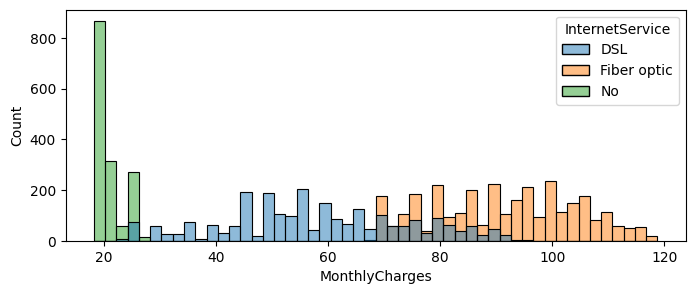

In [ ]:
# histplot
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x="MonthlyCharges", hue="InternetService", bins=50)

<Axes: xlabel='MonthlyCharges'>

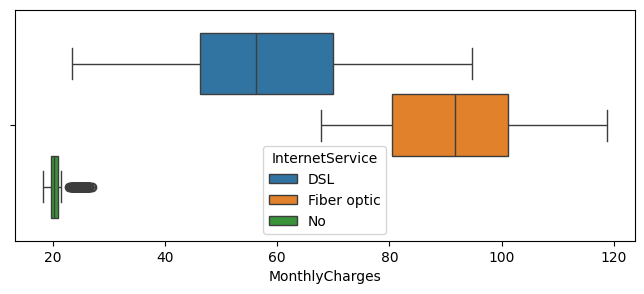

In [ ]:
# ANOVA 결과 시각화 boxplot
plt.figure(figsize=(8, 3))
sns.boxplot(data=df, x="MonthlyCharges", hue="InternetService")

<Axes: xlabel='MonthlyCharges'>

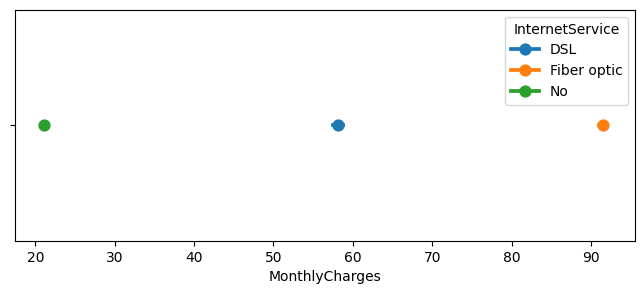

In [ ]:
# pointplot
plt.figure(figsize=(8, 3))
sns.pointplot(data=df, x="MonthlyCharges", hue="InternetService", errorbar="ci")

#### 등분산성 검정 (Levene Test)
* [scipy.stats.levene — SciPy Manual](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

In [ ]:
# 등분산성 검정 (Levene Test)
levene_test = stats.levene(df[df['InternetService'] == 'DSL']['MonthlyCharges'],
                           df[df['InternetService'] == 'Fiber optic']['MonthlyCharges'],
                           df[df['InternetService'] == 'No']['MonthlyCharges'])
levene_test

LeveneResult(statistic=1317.930844027806, pvalue=0.0)

In [ ]:
# sns.kdeplot?

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

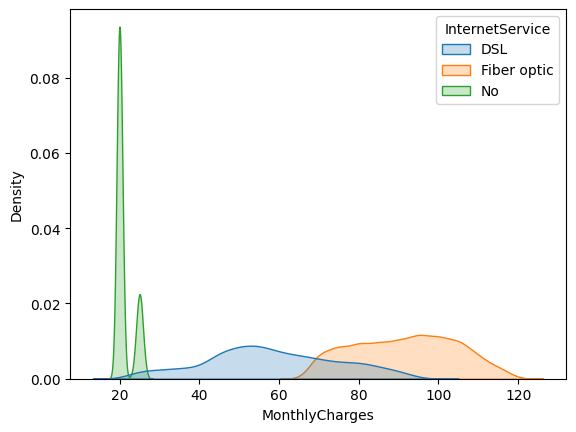

In [ ]:
# 분포의 시각화: KDE 플롯은 각 그룹의 분포가 정규 분포를 따르는지 여부를 시각적으로 평가
# ANOVA는 데이터가 정규 분포를 따른다는 가정을 기반
# 등분산성의 평가: Levene 검정은 ANOVA의 또 다른 전제 조건인 등분산성(모든 그룹의 분산이 동일하다는 가정)을 검증
# 각 그룹의 분산이 유사한지 여부를 통계적으로 평가
# 그룹 간 차이의 시각화: 각 그룹의 'MonthlyCharges' 분포를 보여줌으로써,
# ANOVA 결과에서 나타난 평균 차이가 실제 데이터에서 어떻게 나타나는지 보여줌
# 분포의 형태와 특성 이해: 각 그룹의 분포 형태와 중심 경향성, 그리고 변동성
# 이 정보는 ANOVA의 평균 차이 결과를 더 깊이 이해하는 데 도움
sns.kdeplot(data=df, x="MonthlyCharges", hue="InternetService", fill=True)

<Axes: xlabel='MonthlyCharges', ylabel='Proportion'>

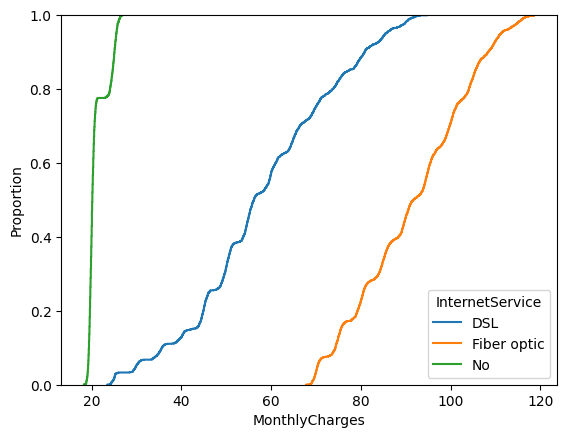

In [ ]:
# 누적 분포 함수(Cumulative Distribution Function, CDF)
# 변수의 분포와 그룹 간 차이를 시각적으로 나타내는 데 유용
# ANOVA 결과에서 나타난 평균 차이가 실제 데이터 분포에서 어떻게 나타나는지 보여줌
# 서로 다른 'InternetService' 그룹 간에 분포가 얼마나 겹치는지, 혹은 명확하게 분리되는지 확인
# ANOVA의 F-통계량과 p-값에 대한 추가적인 시각적 증거를 제공
# 누적 분포 플롯은 데이터의 이상치나 꼬리 부분의 특성을 파악하는 데 도움이 됨
# 이는 ANOVA 분석의 가정(예: 정규성)에 영향을 미칠 수 있는 요소를 식별하는 데 유용

sns.ecdfplot(data=df, x="MonthlyCharges", hue="InternetService")

#### 사후검정(Post Hoc Analysis)
* pairwise_tukeyhsd(): Tukey의 다중비교를 수행하여 각 그룹 간 평균의 차이를 확인합니다.
    * endog: 종속 변수를 나타냅니다. 여기서는 'MonthlyCharges'입니다.
    * groups: 그룹 변수를 나타냅니다. 여기서는 'InternetService'입니다.
    * alpha=0.05: 유의수준을 0.05로 설정합니다.
    
* Tukey의 다중비교는 세 'InternetService' 그룹 간 평균 차이의 통계적 유의성을 평가합니다.
    * meandiff (평균 차이): 그룹간 평균 차이
    * p-adj (조정된 p-값): 모든 그룹 쌍에 대한 p-값은 0.0으로 나타납니다.
    * lower, upper (신뢰 구간): 각 그룹 쌍에 대한 평균 차이의 신뢰 구간이 제공됩니다.
    * reject (기각 여부): 모든 그룹 쌍에 대해 참(true)이므로, 세 그룹 간에 평균 차이가 통계적으로 유의미함을 나타냅니다.

In [ ]:
# 다중비교 (Tukey's HSD)
tukey = pairwise_tukeyhsd(endog=df["MonthlyCharges"], groups=df["InternetService"])
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj  lower    upper   reject
---------------------------------------------------------------
        DSL Fiber optic   33.398   0.0  32.5875  34.2084   True
        DSL          No  -37.023   0.0 -37.9994 -36.0466   True
Fiber optic          No -70.4209   0.0 -71.3553 -69.4866   True
---------------------------------------------------------------


* 가격 전략 재검토
    * Fiber optic 서비스를 사용하는 고객이 DSL보다 평균적으로 더 많은 요금을 지불하는 것을 고려하여, Fiber optic 서비스의 가격 책정이 시장 경쟁력을 갖추고 있는지 재검토할 필요가 있습니다.

* 고객 세분화와 마케팅 전략
    * 서비스 타입별 요금 차이가 큰 것을 고려하여, 고객 세분화를 통한 타겟 마케팅 전략을 개발할 수 있습니다. 예를 들어, DSL 사용 고객에게 Fiber optic 서비스로의 업그레이드를 유도하는 프로모션을 고려할 수 있습니다.

* 서비스 타입별 가치 제안 강화
    * 각 서비스 타입별로 고객에게 제공하는 가치와 이점을 명확히 하여, 고객의 만족도와 충성도를 높일 수 있습니다. 특히, 높은 가격을 지불하는 Fiber optic 서비스 고객들에게 더 높은 품질과 서비스를 제공하는 것이 중요합니다.

* 고객 만족도와 이탈률 분석

* 서비스 타입별 요금 차이가 고객 만족도와 이탈률에 어떤 영향을 미치는지 추가적인 분석이 필요할 수 있습니다. 예를 들어, 높은 요금을 지불하는 고객들이 서비스에 대해 더 높은 기대를 가질 수 있으므로, 이들의 요구와 만족도를 면밀히 파악하는 것이 중요합니다.

* [statsmodels.stats.multicomp.pairwise\_tukeyhsd - statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html)
* [statsmodels.sandbox.stats.multicomp.TukeyHSDResults - statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.TukeyHSDResults.html#statsmodels.sandbox.stats.multicomp.TukeyHSDResults)


* Tukey의 정직한 유의차 검정(Tukey's Honestly Significant Difference, HSD)

\[ $Q = \frac{\bar{X}_i - \bar{X}_j}{\sqrt{\frac{MSE}{n}}}$ \]

여기서:
- $\bar{X}_i$와 $\bar{X}_j$는 두 집단의 표본 평균입니다.
- $MSE$는 평균 제곱 오차(mean squared error)이며, 이는 ANOVA에서 계산됩니다.
- $n$은 각 집단의 표본 크기입니다.
- $Q$는 Tukey의 HSD 통계량으로, 이 값이 특정 임계값을 초과하면 두 집단 간에 유의미한 차이가 있다고 판단합니다.


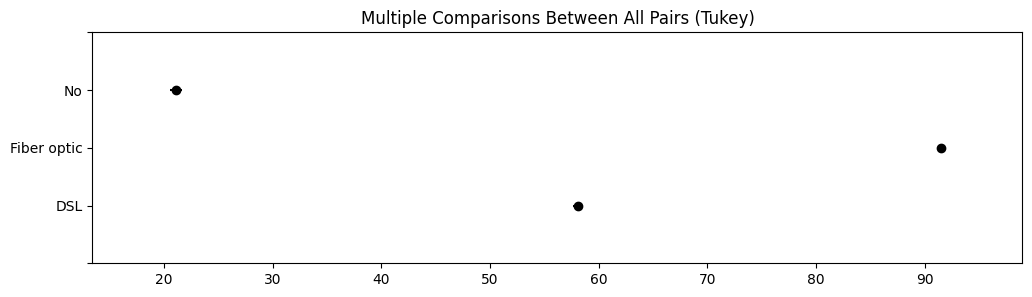

In [ ]:
# Tukey 다중비교 결과 시각화
# Tukey Multiple Comparison of Means
tukey.plot_simultaneous(figsize=(12, 3));